In [95]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix as cm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [96]:
cancerData = datasets.load_breast_cancer()

In [97]:
print(cancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [98]:
cancer_df = pd.DataFrame(cancerData.data, columns = [cancerData.feature_names])
cancer_df['cancer'] = cancerData.target 

In [99]:
cancer_df.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   
3          0.28390         0.2414             0.10520        0.2597   
4          0.13280         0.1980             0.10430        0.1809   

  mean fractal dimension  ... worst texture worst perimeter worst area  \
0                0.07871  ...         17.33          184.60     2019.0   
1                0.05667  ...         23.41          158.80     1956.0   
2                0.05999  ...         25.53          152.50     1709.0   
3                0.09744  ...         26.50           98.87      567.7   
4                0.05883  ...         16.67          152.20     1575.0   

  worst smoothness worst compactness worst concavity worst concave points  \
0           0.1622            0.6656          0.7119               0.2654   
1           0.1238            0.1866          0.2416               0.1860   
2           0.1444            0.4245          0.4504               0.2430   
3           0.2098            0.8663          0.6869               0.2575   
4           0.1374            0.2050          0.4000               0.1625   

  worst symmetry worst fractal dimension cancer  
0         0.4601                 0.11890      0  
1         0.2750                 0.08902      0  
2         0.3613                 0.08758      0  
3         0.6638                 0.17300      0  
4         0.2364                 0.07678      0  

[5 rows x 31 columns]

In [100]:
x_columns = ['mean radius', 'mean symmetry']
X = cancer_df[x_columns]
y = cancer_df.cancer

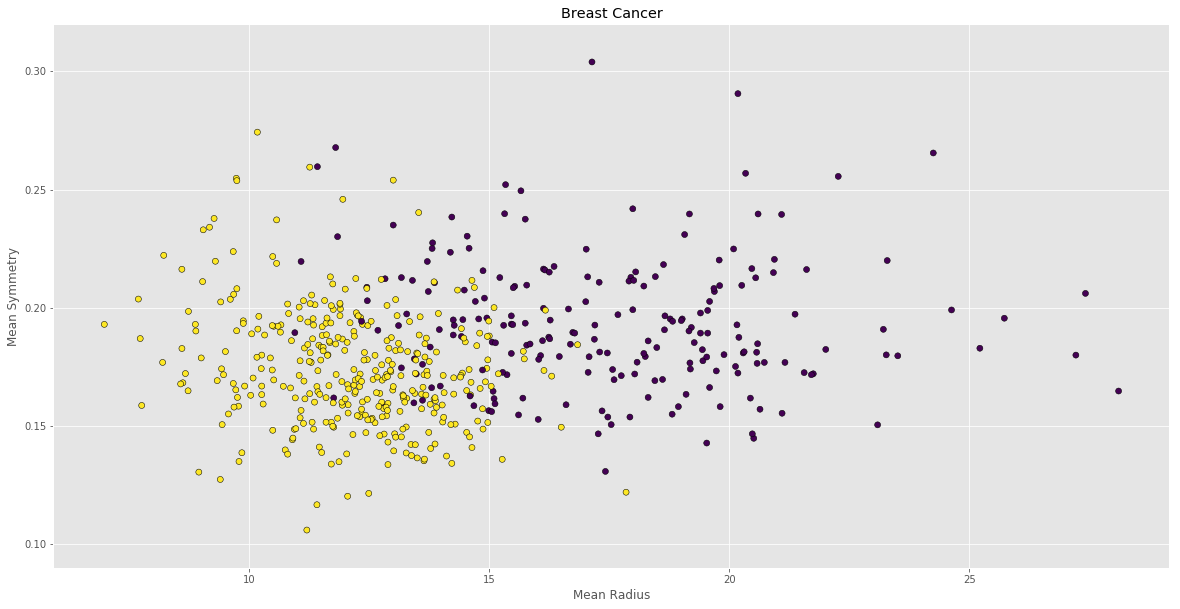

In [101]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer

plt.figure(figsize=(20,10))

plt.title('Breast Cancer')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

plt.show()

In [102]:
lin_clf = linear_model.LogisticRegression().fit(X, y)

In [103]:
lin_clf.predict_proba(X)

array([[0.82932565, 0.17067435],
       [0.95113102, 0.04886898],
       [0.92386682, 0.07613318],
       ...,
       [0.6927092 , 0.3072908 ],
       [0.95235258, 0.04764742],
       [0.01836839, 0.98163161]])

In [104]:
lin_clf.predict(X)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [105]:
intercept = lin_clf.intercept_
coefs = lin_clf.coef_

In [106]:
coefs

array([[-0.54200765, -0.17670812]])

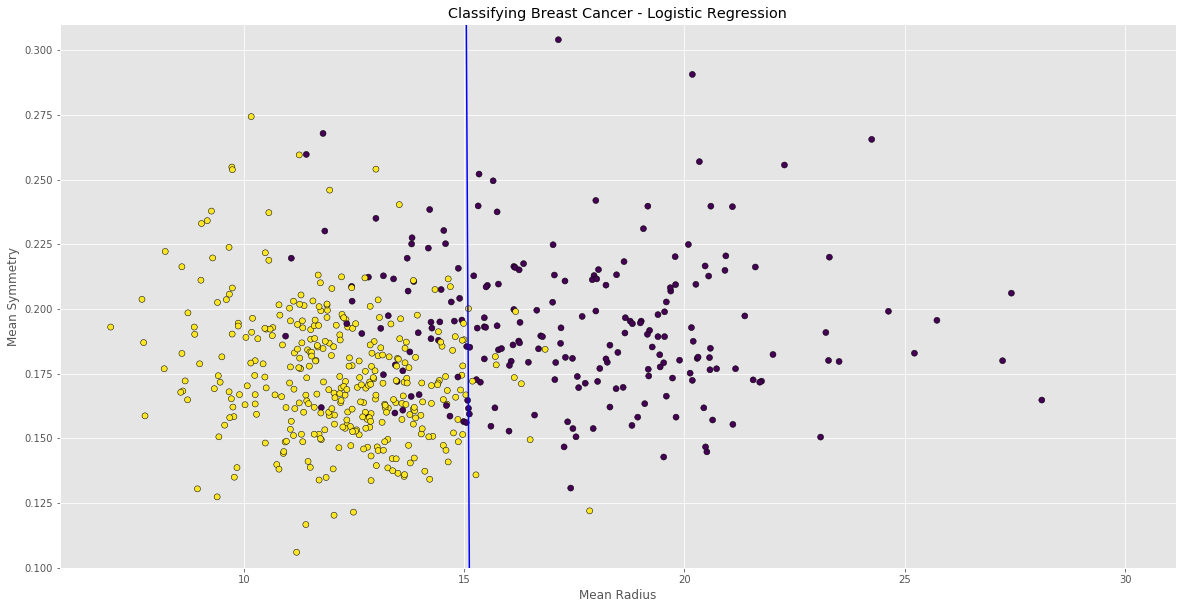

In [107]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer
plt.figure(figsize=(20,10))
plt.title('Classifying Breast Cancer - Logistic Regression')

plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

#hack to plot decision boundary
ex1 = np.linspace(10, 30, 100)
ex2 = -(coefs[:, 0] * ex1 + intercept) / coefs[:,1]
plt.plot(ex1, ex2, color='b')

#hack to reorient the axis limit
plt.ylim(0.1,0.31)

plt.show()

In [108]:
dtree = DecisionTreeClassifier(max_depth = 3).fit(X,y)

In [109]:
import numpy as np
from collections import deque
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree as ctree
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class AABB:
    """Axis-aligned bounding box"""
    def __init__(self, n_features):
        self.limits = np.array([[-np.inf, np.inf]] * n_features)

    def split(self, f, v):
        left = AABB(self.limits.shape[0])
        right = AABB(self.limits.shape[0])
        left.limits = self.limits.copy()
        right.limits = self.limits.copy()

        left.limits[f, 1] = v
        right.limits[f, 0] = v

        return left, right


def tree_bounds(tree, n_features=None):
    """Compute final decision rule for each node in tree"""
    if n_features is None:
        n_features = np.max(tree.feature) + 1
    aabbs = [AABB(n_features) for _ in range(tree.node_count)]
    queue = deque([0])
    while queue:
        i = queue.pop()
        l = tree.children_left[i]
        r = tree.children_right[i]
        if l != ctree.TREE_LEAF:
            aabbs[l], aabbs[r] = aabbs[i].split(tree.feature[i], tree.threshold[i])
            queue.extend([l, r])
    return aabbs


def decision_areas(tree_classifier, maxrange, x=0, y=1, n_features=None):
    """ Extract decision areas.

    tree_classifier: Instance of a sklearn.tree.DecisionTreeClassifier
    maxrange: values to insert for [left, right, top, bottom] if the interval is open (+/-inf) 
    x: index of the feature that goes on the x axis
    y: index of the feature that goes on the y axis
    n_features: override autodetection of number of features
    """
    tree = tree_classifier.tree_
    aabbs = tree_bounds(tree, n_features)

    rectangles = []
    for i in range(len(aabbs)):
        if tree.children_left[i] != ctree.TREE_LEAF:
            continue
        l = aabbs[i].limits
        r = [l[x, 0], l[x, 1], l[y, 0], l[y, 1], np.argmax(tree.value[i])]
        rectangles.append(r)
    rectangles = np.array(rectangles)
    rectangles[:, [0, 2]] = np.maximum(rectangles[:, [0, 2]], maxrange[0::2])
    rectangles[:, [1, 3]] = np.minimum(rectangles[:, [1, 3]], maxrange[1::2])
    return rectangles

def plot_areas(rectangles):
    for rect in rectangles:
        color = ['b', 'y'][int(rect[4])]
        #print(rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1])
        rp = Rectangle([rect[0], rect[2]], 
                       rect[1] - rect[0], 
                       rect[3] - rect[2], color=color, alpha=0.3)
        plt.gca().add_artist(rp)

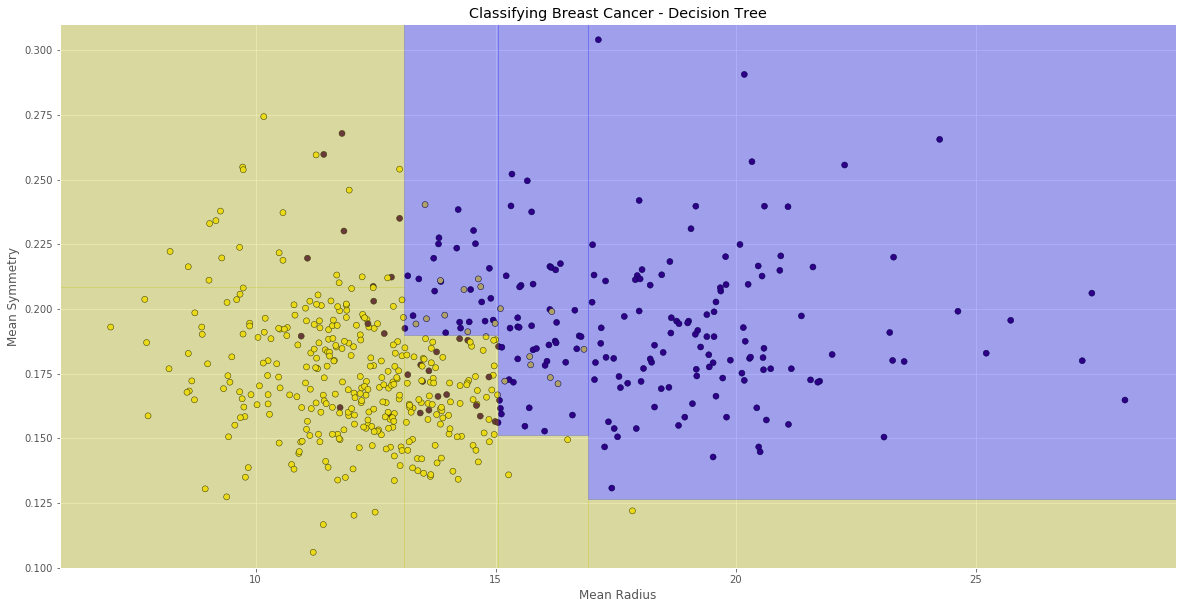

In [110]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer
plt.figure(figsize=(20,10))
plt.title('Classifying Breast Cancer - Decision Tree')

plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

rectangles = decision_areas(dtree, [5, 30, 0., 0.31])
plot_areas(rectangles)

#hack to reorient the axis limit
plt.ylim(0.1,0.31)

plt.show()

In [111]:
dtree = DecisionTreeClassifier(max_depth = 6).fit(X,y)

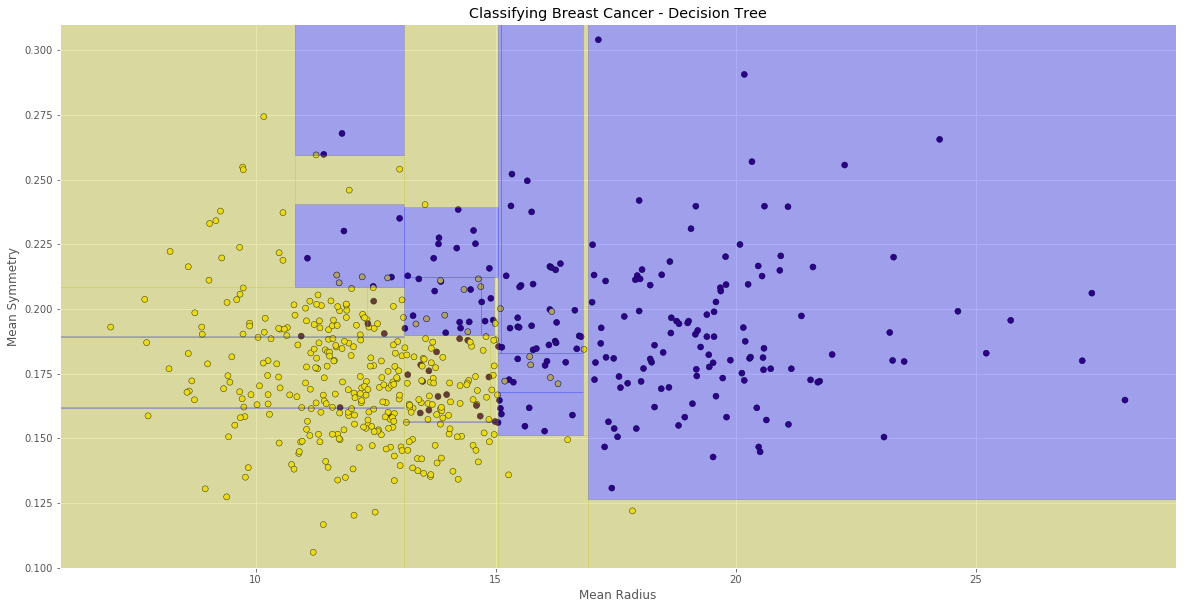

In [112]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer
plt.figure(figsize=(20,10))
plt.title('Classifying Breast Cancer - Decision Tree')

plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

rectangles = decision_areas(dtree, [5, 30, 0., 0.31])
plot_areas(rectangles)

#hack to reorient the axis limit
plt.ylim(0.1,0.31)

plt.show()

In [113]:
# Import the necessary modules and libraries
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [114]:
cancer_df.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   
3          0.28390         0.2414             0.10520        0.2597   
4          0.13280         0.1980             0.10430        0.1809   

  mean fractal dimension  ... worst texture worst perimeter worst area  \
0                0.07871  ...         17.33          184.60     2019.0   
1                0.05667  ...         23.41          158.80     1956.0   
2                0.05999  ...         25.53          152.50     1709.0   
3                0.09744  ...         26.50           98.87      567.7   
4                0.05883  ...         16.67          152.20     1575.0   

  worst smoothness worst compactness worst concavity worst concave points  \
0           0.1622            0.6656          0.7119               0.2654   
1           0.1238            0.1866          0.2416               0.1860   
2           0.1444            0.4245          0.4504               0.2430   
3           0.2098            0.8663          0.6869               0.2575   
4           0.1374            0.2050          0.4000               0.1625   

  worst symmetry worst fractal dimension cancer  
0         0.4601                 0.11890      0  
1         0.2750                 0.08902      0  
2         0.3613                 0.08758      0  
3         0.6638                 0.17300      0  
4         0.2364                 0.07678      0  

[5 rows x 31 columns]

In [115]:
features_list = ['mean radius', 'mean perimeter', 'cancer']
cancer_df_df = cancer_df[features_list]

In [116]:
cancer_df_df.head()

mean radius mean perimeter cancer
0       17.99         122.80      0
1       20.57         132.90      0
2       19.69         130.00      0
3       11.42          77.58      0
4       20.29         135.10      0

In [117]:
cancer_df_response = cancer_df['mean symmetry']
X_train, X_test, y_train, y_test = train_test_split(cancer_df_df, cancer_df_response, test_size = 0.7, random_state = 0)

In [118]:
#mean_symmetry = np.mean(pd.to_numeric(X_train[X_train['mean symmetry'] != '?']['mean symmetry']))
#mean_symmetry
mean_radius = np.mean(X_train['mean radius']) #all row at a feature
mean_radius

mean radius    14.341882
dtype: float64

In [119]:
#X_train[X_train[len('mean symmetry')/10]['mean symmetry']] = mean_symmetry #wanna append the mean values at the end of the row
#X_train.mean_symmetry = pd.to_numeric(X_train.mean_symmetry)

In [120]:
lmodel = linear_model.LinearRegression()
print(lmodel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [121]:
cross_val_score(lmodel, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

array([-0.00140566, -0.00025795, -0.00024712, -0.00017644, -0.00044861,
       -0.00071831, -0.00038194, -0.00070273, -0.00077259, -0.00049748])

In [122]:
rmse_scores = np.sqrt(-cross_val_score(lmodel, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
rmse_scores

array([0.0374921 , 0.01606093, 0.01571989, 0.01328305, 0.0211805 ,
       0.02680131, 0.01954325, 0.02650898, 0.02779542, 0.0223043 ])

In [123]:
print("RMSE: %0.6f (+/- %0.6f)" % (rmse_scores.mean(), rmse_scores.std() * 2))

RMSE: 0.022669 (+/- 0.013711)


In [124]:
tree_1 = DecisionTreeRegressor(max_depth=3)
tree_2 = DecisionTreeRegressor(max_depth=6)

In [125]:
rmse_scores = np.sqrt(-cross_val_score(tree_1, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print("tree_1 RMSE: %0.6f (+/- %0.6f)" % (rmse_scores.mean(), rmse_scores.std() * 2))

tree_1 RMSE: 0.028022 (+/- 0.012132)


In [126]:
rmse_scores = np.sqrt(-cross_val_score(tree_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print("tree_2 RMSE: %0.6f (+/- %0.6f)" % (rmse_scores.mean(), rmse_scores.std() * 2))

tree_2 RMSE: 0.031707 (+/- 0.012545)


In [127]:
#let's try kNN
kNN = KNeighborsRegressor(n_neighbors=10)

In [128]:
rmse_scores = np.sqrt(-cross_val_score(kNN, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print("kNN RMSE: %0.6f (+/- %0.6f)" % (rmse_scores.mean(), rmse_scores.std() * 2))

kNN RMSE: 0.028748 (+/- 0.011496)


In [129]:
#preprocess

#impute with previously computed mean_horsepower
#X_test[X_test['mean radius'] == '?'] = mean_symmetry
#X_test.mean_symmetry = pd.to_numeric(X_test.mean_symmetry)

In [130]:
#for a tree of depth 3, between 1 and 6.8
tree_1.fit(X_train, y_train)
y_preds = tree_1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

0.025621342702979

In [131]:
#for a lmodel, between maybe 1 and 24
lmodel.fit(X_train, y_train)
y_preds = lmodel.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

0.021944865218716286

In [132]:
#for a tree of depth 3, between 1 and 6.8
tree_2.fit(X_train, y_train)
y_preds = tree_2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

0.02884356718077108

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [135]:
cancer_df['label'] = (cancer_df['cancer']==0).astype('int')

In [136]:
cancer_df.head(3)

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38          122.8    1001.0         0.11840   
1       20.57        17.77          132.9    1326.0         0.08474   
2       19.69        21.25          130.0    1203.0         0.10960   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   

  mean fractal dimension  ... worst perimeter worst area worst smoothness  \
0                0.07871  ...           184.6     2019.0           0.1622   
1                0.05667  ...           158.8     1956.0           0.1238   
2                0.05999  ...           152.5     1709.0           0.1444   

  worst compactness worst concavity worst concave points worst symmetry  \
0            0.6656          0.7119               0.2654         0.4601   
1            0.1866          0.2416               0.1860         0.2750   
2            0.4245          0.4504               0.2430         0.3613   

  worst fractal dimension cancer label  
0                 0.11890      0     1  
1                 0.08902      0     1  
2                 0.08758      0     1  

[3 rows x 32 columns]

In [137]:
features_list = ['mean radius', 'mean symmetry', 'mean perimeter', 'mean smoothness', 'mean area']
X_train, X_test, y_train, y_test = train_test_split(cancer_df[features_list], cancer_df['cancer'], test_size = 0.7, random_state = 0)

In [138]:
mean_radius = np.mean(X_train['mean radius'])
print(mean_radius)

mean radius    14.341882
dtype: float64


In [139]:
all_zeros = np.zeros(len(y_train))
print('baseline zeros accuracy: ', accuracy_score(y_train, all_zeros))

baseline zeros accuracy:  0.38823529411764707


In [140]:
lmodel = linear_model.LogisticRegression()
accuracy = cross_val_score(lmodel, X_train, y_train, cv=10, scoring='accuracy')
print("linear model RMSE: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))

linear model RMSE: 0.89 (+/- 0.07)


In [141]:
tree_1 = DecisionTreeClassifier(max_depth=3)
accuracy = cross_val_score(tree_1, X_train, y_train, cv=10, scoring='accuracy')
print("linear model RMSE: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))

linear model RMSE: 0.87 (+/- 0.12)


In [142]:
tree_1.fit(X_train, y_train)
y_preds = tree_1.predict(X_test)
accuracy_score(y_test, y_preds)

0.8671679197994987

In [143]:
lmodel.fit(X_train, y_train)
y_preds = lmodel.predict(X_test)
accuracy_score(y_test, y_preds)

0.8897243107769424